In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
from torchvision import transforms
from torchvision.datasets import CelebA
from torch.utils.data import DataLoader, Dataset
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Path to CelebA dataset
celeba_root = "/path/to/celeba/dataset"

# Define transforms
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
])

# Load CelebA dataset
celeba_dataset = CelebA(root=celeba_root, split='all', download=True, transform=transform)


Downloading...
From (original): https://drive.google.com/uc?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM
From (redirected): https://drive.usercontent.google.com/download?id=0B7EVK8r0v71pZjFTYXZWM3FlRnM&confirm=t&uuid=4027297c-6fd5-413c-835b-52073f1a74af
To: /path/to/celeba/dataset/celeba/img_align_celeba.zip
100%|██████████| 1.44G/1.44G [00:15<00:00, 93.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pblRyaVFSWGxPY0U
To: /path/to/celeba/dataset/celeba/list_attr_celeba.txt
100%|██████████| 26.7M/26.7M [00:00<00:00, 176MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_ee_0u7vcNLOfNLegJRHmolfH5ICW-XS
To: /path/to/celeba/dataset/celeba/identity_CelebA.txt
100%|██████████| 3.42M/3.42M [00:00<00:00, 180MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pbThiMVRxWXZ4dU0
To: /path/to/celeba/dataset/celeba/list_bbox_celeba.txt
100%|██████████| 6.08M/6.08M [00:00<00:00, 227MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B7EVK8r0v71pd0FJY3Blby1HUT

In [ ]:
def filter_images(dataset):
    men_with_glasses = []
    men_without_glasses = []
    women_with_glasses = []
    women_without_glasses = []
    people_with_glasses = []
    people_without_glasses = []
    smiling_men = []
    people_with_hat = []
    people_with_mustache =[]
    people_without_mustache =[]

#smiling men , people with hat, people with mustache , people without mustache
#smiling 31, mustache 22, wearing_hat 35
    for idx in range(len(dataset)):
        _, labels = dataset[idx]

        gender = "men" if labels[20] == 1 else "women"
        glasses = "with_glasses" if labels[15] == 1 else "without_glasses"
        mustache = "with_mustache" if labels[22] == 1 else "without_mustache"
        smiling = "smiling" if labels[31] == 1 else "not_smiling"
        wearing_hat = "having_hat" if labels[35] == 1 else "no_hat"

        if gender == "men" and smiling == "smiling":
           smiling_men.append(idx)
        if wearing_hat == "having_hat":
           people_with_hat.append(idx)
        if mustache == "with_mustache":
            people_with_mustache.append(idx)
        if mustache == "without"
        if gender == "men" and glasses == "with_glasses":
            men_with_glasses.append(idx)
            people_with_glasses.append(idx)
        elif gender == "men" and glasses == "without_glasses":
            men_without_glasses.append(idx)
            people_without_glasses.append(idx)
        elif gender == "women" and glasses == "with_glasses":
            women_with_glasses.append(idx)
            people_with_glasses.append(idx)
        elif gender == "women" and glasses == "without_glasses":
            women_without_glasses.append(idx)
            people_without_glasses.append(idx)





    return {
        "men_with_glasses": men_with_glasses,
        "men_without_glasses": men_without_glasses,
        "women_with_glasses": women_with_glasses,
        "women_without_glasses": women_without_glasses,
        "people_without_glasses": people_without_glasses,
        "people_with_glasses": people_with_glasses
    }

filtered_indices = filter_images(celeba_dataset)
men_with_glasses_indices = filtered_indices["men_with_glasses"]
men_without_glasses_indices = filtered_indices["men_without_glasses"]
women_with_glasses_indices = filtered_indices["women_with_glasses"]
women_without_glasses_indices = filtered_indices["women_without_glasses"]
people_without_glasses_indices = filtered_indices["people_without_glasses"]
people_with_glasses_indices = filtered_indices["people_with_glasses"]

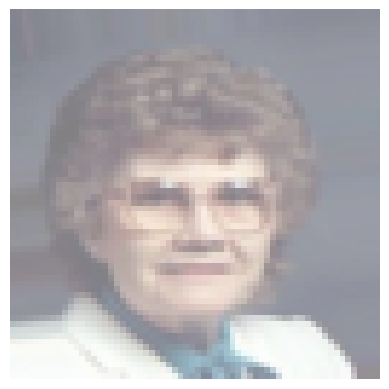

In [ ]:
class SubsetDataset(Dataset):
    def __init__(self, dataset, indices):
        self.dataset = dataset
        self.indices = indices

    def __len__(self):
        return len(self.indices)

    def __getitem__(self, idx):
        idx_in_dataset = self.indices[idx]
        return self.dataset[idx_in_dataset]

# Create a subset dataset for men without glasses
men_with_glasses_dataset = SubsetDataset(celeba_dataset, men_with_glasses_indices)
men_without_glasses_dataset = SubsetDataset(celeba_dataset, men_without_glasses_indices)
women_without_glasses_dataset = SubsetDataset(celeba_dataset, women_without_glasses_indices)
women_with_glasses_dataset = SubsetDataset(celeba_dataset, women_with_glasses_indices)
people_without_glasses_dataset = SubsetDataset(celeba_dataset, people_without_glasses_indices)
people_with_glasses_dataset = SubsetDataset(celeba_dataset, people_with_glasses_indices)

import matplotlib.pyplot as plt

# sample_image, _ = men_with_glasses_dataset[0]
# plt.imshow(sample_image.permute(1, 2, 0))
# plt.axis('off')
# plt.show()

# sample_image, _ = men_without_glasses_dataset[65]
# plt.imshow(sample_image.permute(1, 2, 0)*0.5+0.5)
# plt.axis('off')
# plt.show()

# sample_image, _ = women_without_glasses_dataset[5]
# plt.imshow(sample_image.permute(1, 2, 0)*0.5+0.5)
# plt.axis('off')
# plt.show()

sample_image, _ = women_with_glasses_dataset[68]
plt.imshow(sample_image.permute(1, 2, 0)*0.5+0.5)
plt.axis('off')
plt.show()


In [ ]:
from torch.utils.data import DataLoader

# Create DataLoader objects for each subset dataset
men_with_glasses_loader = DataLoader(men_with_glasses_dataset, batch_size=2, shuffle=True, num_workers=4)
men_without_glasses_loader = DataLoader(men_without_glasses_dataset, batch_size=2, shuffle=True, num_workers=4)
women_with_glasses_loader = DataLoader(women_with_glasses_dataset, batch_size=2, shuffle=True, num_workers=4)
women_without_glasses_loader = DataLoader(women_without_glasses_dataset, batch_size=2, shuffle=True, num_workers=4)
people_without_glasses_loader = DataLoader(people_without_glasses_dataset, batch_size=2, shuffle=True, num_workers=4)
people_with_glasses_loader = DataLoader(people_with_glasses_dataset, batch_size=2, shuffle=True, num_workers=4)

# Define the transformations for the input images
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize the images
    transforms.ToTensor(),  # Convert to PyTorch tensor
])

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
import argparse
import os
import random
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

manualSeed = 999
print("Random Seed: ", manualSeed)
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True)

Random Seed:  999


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


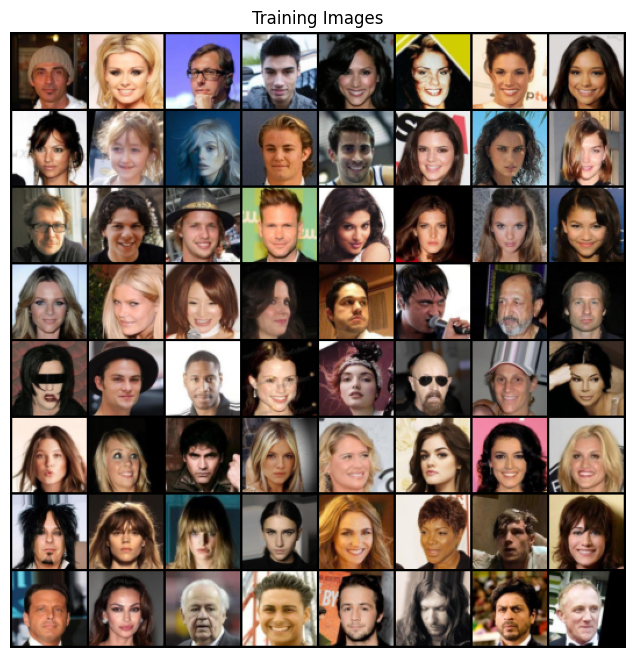

In [ ]:
dataroot = "/path/to/celeba/dataset"
workers = 2
batch_size = 128
image_size = 64
nc = 3
nz = 100
ngf = 64
ndf = 64
num_epochs = 1
lr = 0.0002
beta1 = 0.5
ngpu = 1

dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.CenterCrop(image_size),
                               transforms.ToTensor(),
                           ]))
dataset_val = dset.ImageFolder(root= dataroot,transform=transforms.Compose([
                                transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                            ]))
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size,
                                         shuffle=True, num_workers=workers)
dataloader_val = torch.utils.data.DataLoader(dataset_val, batch_size=batch_size,shuffle=True)

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")
real_batch = next(iter(dataloader))
plt.figure(figsize=(8,8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0].to(device)[:64], padding=2, normalize=True).cpu(),(1,2,0)))
plt.show()

In [ ]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [ ]:
class Generator(nn.Module):
    def __init__(self, ngpu):
        super(Generator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.ConvTranspose2d( nz, ngf * 8, 4, 1, 0, bias=False),
            nn.BatchNorm2d(ngf * 8),
            nn.ReLU(True),
            nn.ConvTranspose2d(ngf * 8, ngf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 4),
            nn.ReLU(True),
            nn.ConvTranspose2d( ngf * 4, ngf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf * 2),
            nn.ReLU(True),
            nn.ConvTranspose2d( ngf * 2, ngf, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ngf),
            nn.ReLU(True),
            nn.ConvTranspose2d( ngf, nc, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

netG = Generator(ngpu).to(device)

if (device.type == 'cuda') and (ngpu > 1):
    netG = nn.DataParallel(netG, list(range(ngpu)))

netG.apply(weights_init)


Generator(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

In [ ]:
class Discriminator(nn.Module):
    def __init__(self, ngpu):
        super(Discriminator, self).__init__()
        self.ngpu = ngpu
        self.main = nn.Sequential(
            nn.Conv2d(nc, ndf, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(ndf, ndf * 2, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 2),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 2, ndf * 4, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 4),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 4, ndf * 8, 4, 2, 1, bias=False),
            nn.BatchNorm2d(ndf * 8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(ndf * 8, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

In [ ]:
netD = Discriminator(ngpu).to(device)

if (device.type == 'cuda') and (ngpu > 1):
    netD = nn.DataParallel(netD, list(range(ngpu)))

netD.apply(weights_init)


Discriminator(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [ ]:
criterion = nn.BCELoss()
fixed_noise = torch.randn(64, nz, 1, 1, device=device)

real_label = 1.
fake_label = 0.

optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

In [ ]:
img_list = []
G_losses = []
D_losses = []
iters = 0

print("Starting Training Loop...")
for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):

        netD.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), real_label, dtype=torch.float, device=device)
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()
        D_x = output.mean().item()
        noise = torch.randn(b_size, nz, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(fake_label)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()
        netG.zero_grad()
        label.fill_(real_label)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()

        if i % 50 == 0:
            print('[%d/%d][%d/%d]\tLoss_D: %.4f\tLoss_G: %.4f\tD(x): %.4f\tD(G(z)): %.4f / %.4f'
                  % (epoch, num_epochs, i, len(dataloader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))

        G_losses.append(errG.item())
        D_losses.append(errD.item())

        if (iters % 500 == 0) or ((epoch == num_epochs-1) and (i == len(dataloader)-1)):
            with torch.no_grad():
                fake = netG(fixed_noise).detach().cpu()
            img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

        iters += 1

Starting Training Loop...
[0/1][0/1583]	Loss_D: 0.2757	Loss_G: 7.8104	D(x): 0.9069	D(G(z)): 0.0766 / 0.0007
[0/1][50/1583]	Loss_D: 0.3579	Loss_G: 29.1879	D(x): 0.8369	D(G(z)): 0.0000 / 0.0000
[0/1][100/1583]	Loss_D: 0.6338	Loss_G: 10.8592	D(x): 0.9293	D(G(z)): 0.3608 / 0.0001
[0/1][150/1583]	Loss_D: 0.3080	Loss_G: 5.0940	D(x): 0.8614	D(G(z)): 0.0948 / 0.0117
[0/1][200/1583]	Loss_D: 0.4880	Loss_G: 4.5565	D(x): 0.7483	D(G(z)): 0.0750 / 0.0190
[0/1][250/1583]	Loss_D: 0.9478	Loss_G: 3.3448	D(x): 0.6575	D(G(z)): 0.1042 / 0.0681
[0/1][300/1583]	Loss_D: 0.4353	Loss_G: 4.7220	D(x): 0.7686	D(G(z)): 0.0805 / 0.0175
[0/1][350/1583]	Loss_D: 0.5116	Loss_G: 5.7112	D(x): 0.9095	D(G(z)): 0.2866 / 0.0094
[0/1][400/1583]	Loss_D: 0.4003	Loss_G: 4.3114	D(x): 0.7815	D(G(z)): 0.0891 / 0.0207
[0/1][450/1583]	Loss_D: 0.9779	Loss_G: 8.9290	D(x): 0.9222	D(G(z)): 0.5071 / 0.0009
[0/1][500/1583]	Loss_D: 0.9124	Loss_G: 5.9087	D(x): 0.8374	D(G(z)): 0.3938 / 0.0068
[0/1][550/1583]	Loss_D: 0.4706	Loss_G: 5.0551	D(x):

In [ ]:
class Encoder(nn.Module):
    def __init__(self, channels, latent_dim=100):
        super(Encoder, self).__init__()
        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(512),
            nn.Conv2d(512, 512, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.BatchNorm2d(512),
            nn.Flatten()
        )
        self.fc = nn.Linear(512 * 2 * 2, latent_dim)

    def forward(self, img):
        x = self.main(img)
        return self.fc(x)

In [ ]:
#Training the encoder
netG = Generator(ngpu = 1)
netG.eval()

criterion = nn.MSELoss()
encoder = Encoder(channels = 1).to(device)
optimizer = optim.Adam(encoder.parameters(),lr=0.0002,betas=(0.5,0.999))
print("Starting Training Loop...")
for epoch in range(1):
  encoder.train()
  total_loss = 0
  for batch_idx, (real, _) in enumerate(dataloader):
      real = real.to(device)
      noise = encoder(real).view(-1, 100, 1, 1)
      fake = netG(noise)
      loss = criterion(real, fake)
      total_loss += loss.item()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      avg_loss = total_loss / len(dataloader)
      print(f"Epoch [{epoch+1}/{20}] Loss: {avg_loss}")


  encoder.eval()
  val_loss = 0
  with torch.no_grad():
      for _, (real, _) in enumerate(dataloader_val):
          real = real.to(device)
          noise = encoder(real).view(-1, 100, 1, 1)
          fake = netG(noise)
          val_loss += criterion(real, fake).item()
  avg_val_loss = val_loss / len(dataloader_val)
  print(f"Validation Loss: {avg_val_loss}")


  fig, axs = plt.subplots(2, 5, figsize=(15, 6))
  for j in range(5):
      axs[0,j].imshow(real[j].detach().cpu().numpy().transpose(1, 2, 0))
      axs[0,j].axis('off')
      axs[1,j].imshow(fake[j].detach().cpu().numpy().transpose(1, 2, 0))
      axs[1,j].axis('off')

  plt.tight_layout()
  plt.savefig(f"results_enc/images_{epoch}.png")
  plt.close()

Starting Training Loop...
Epoch [1/20] Loss: 0.00018397837745488178
Epoch [1/20] Loss: 0.00036318412854260306
Epoch [1/20] Loss: 0.0005510638992167392
Epoch [1/20] Loss: 0.0007328572938958828
Epoch [1/20] Loss: 0.0008984702678699699
Epoch [1/20] Loss: 0.0010875599789453773
Epoch [1/20] Loss: 0.0012574940637478855
Epoch [1/20] Loss: 0.001435911173468064
Epoch [1/20] Loss: 0.001609858631409954
Epoch [1/20] Loss: 0.0017846578370899772
Epoch [1/20] Loss: 0.0019506745073363063
Epoch [1/20] Loss: 0.002147831931117209
Epoch [1/20] Loss: 0.0023125719775599313
Epoch [1/20] Loss: 0.0024912105431981425
Epoch [1/20] Loss: 0.0026538675334434004
Epoch [1/20] Loss: 0.002832087511061417
Epoch [1/20] Loss: 0.0030057705698778416
Epoch [1/20] Loss: 0.0031746089722036338
Epoch [1/20] Loss: 0.0033361552752653257
Epoch [1/20] Loss: 0.003511085550919109
Epoch [1/20] Loss: 0.003696178399680614
Epoch [1/20] Loss: 0.003856787143895239
Epoch [1/20] Loss: 0.00402754027483513
Epoch [1/20] Loss: 0.00419938937064898

KeyboardInterrupt: 

In [ ]:
# Function to get the first 5 images from a data loader
def get_images(data_loader, image_list):
    for i, (images, _) in enumerate(data_loader):
        if i >= 5:
            break
        for image in images:
            image_list.append(image)

men_with_glasses = []
men_no_glasses = []
women_with_glasses = []
women_no_glasses = []
people_with_glasses = []
people_no_glasses = []

# Get images from the data loaders
get_images(men_with_glasses_loader, men_with_glasses)
get_images(men_without_glasses_loader, men_no_glasses)
get_images(women_with_glasses_loader, women_with_glasses)
get_images(women_without_glasses_loader, women_no_glasses)
get_images(people_with_glasses_loader, people_with_glasses)
get_images(people_without_glasses_loader, people_no_glasses)

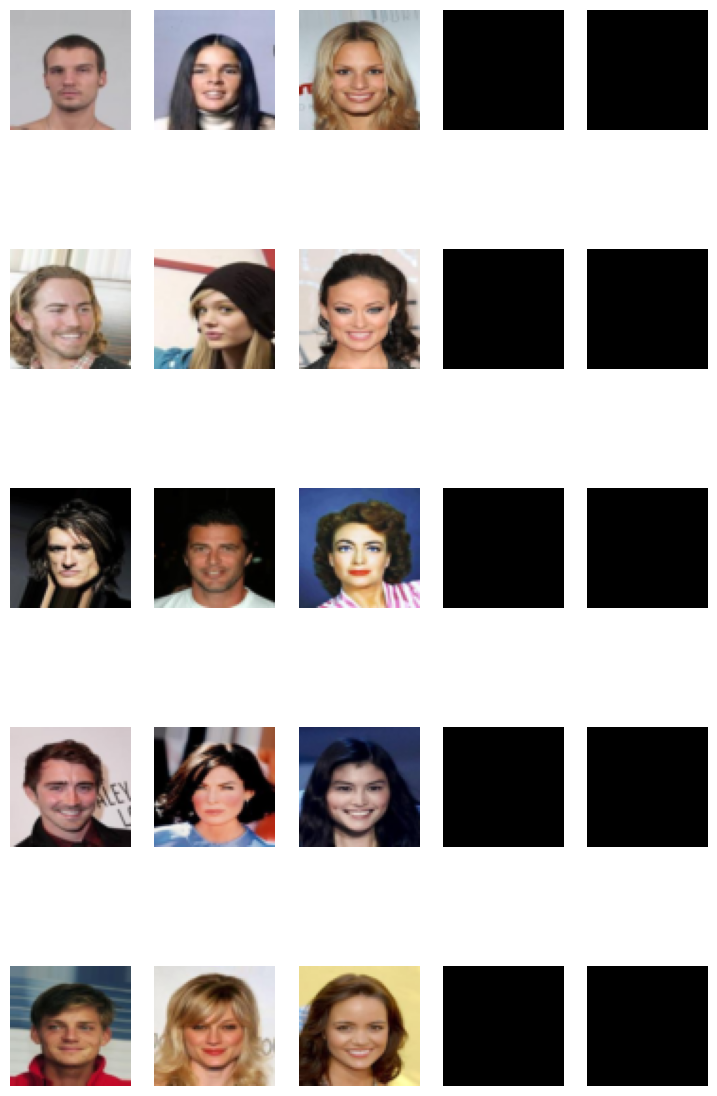

In [ ]:
manualSeed = 69
random.seed(manualSeed)
torch.manual_seed(manualSeed)
torch.use_deterministic_algorithms(True)

netG = Generator(ngpu = 1)
netG.eval()
encoder = Encoder(channels = 3)
encoder.eval()

insides = []
outsides = []
for i in range(5):
    men_no_glasses_batch = men_no_glasses[i].unsqueeze(0)
    people_with_glasses_batch = people_with_glasses[i].unsqueeze(0)
    people_no_glasses_batch = people_no_glasses[i].unsqueeze(0)

    inside = encoder(men_no_glasses_batch) + encoder(people_with_glasses_batch) - encoder(people_no_glasses_batch)
    outside = encoder(men_no_glasses_batch + people_with_glasses_batch - people_no_glasses_batch)
    inside_image = netG(inside.view(-1, 100, 1, 1))
    outside_image = netG(outside.view(-1, 100, 1, 1))
    insides.append(inside_image)
    outsides.append(outside_image)


fig, axs = plt.subplots(5, 5, figsize=(9, 15))
for i in range(5):
    axs[i,0].imshow(men_no_glasses[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
    axs[i,0].axis('off')
    axs[i,1].imshow(people_with_glasses[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
    axs[i,1].axis('off')
    axs[i,2].imshow(people_no_glasses[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
    axs[i,2].axis('off')
    axs[i,3].imshow(insides[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
    axs[i,3].axis('off')
    axs[i,4].imshow(outsides[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
    axs[i,4].axis('off')
plt.show()
plt.close()

# insides = []
# outsides = []
# for i in range(5):
#     inside = encoder(men_with_glasses[i]) - encoder(men_no_glasses[i]) + encoder(women_no_glasses[i])
#     outside = encoder(men_with_glasses[i] - men_no_glasses[i] + women_no_glasses[i])
#     inside_image = netG(inside.view(-1, 100, 1, 1))
#     outside_image = netG(outside.view(-1, 100, 1, 1))
#     insides.append(inside_image)
#     outsides.append(outside_image)

# fig, axs = plt.subplots(5, 5, figsize=(9, 15))
# for i in range(5):
#     axs[i,0].imshow(men_with_glasses[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,0].axis('off')
#     axs[i,1].imshow(men_no_glasses[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,1].axis('off')
#     axs[i,2].imshow(women_no_glasses[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,2].axis('off')
#     axs[i,3].imshow(insides[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,3].axis('off')
#     axs[i,4].imshow(outsides[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,4].axis('off')
# plt.tight_layout()
# plt.close()

# insides = []
# outsides = []
# for i in range(5):
#     inside = encoder(men_with_smile[i]) + encoder(people_with_hat[i]) - encoder(people_no_hat[i]) + encoder(people_with_mus[i]) - encoder(people_no_mus[i])
#     outside = encoder(men_with_smile[i] + people_with_hat[i] - people_no_hat[i] + people_with_mus[i] - people_no_mus[i])
#     inside_image = netG(inside.view(-1, 100, 1, 1))
#     outside_image = netG(outside.view(-1, 100, 1, 1))
#     insides.append(inside_image)
#     outsides.append(outside_image)


# fig, axs = plt.subplots(5, 7, figsize=(9, 21))
# for i in range(5):
#     axs[i,0].imshow(men_with_smile[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,0].axis('off')
#     axs[i,1].imshow(people_with_hat[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,1].axis('off')
#     axs[i,2].imshow(people_no_hat[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,2].axis('off')
#     axs[i,3].imshow(people_with_mus[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,3].axis('off')
#     axs[i,4].imshow(people_no_mus[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,4].axis('off')
#     axs[i,5].imshow(insides[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,5].axis('off')
#     axs[i,6].imshow(outsides[i].view(3,64,64).detach().cpu().numpy().transpose(1, 2, 0))
#     axs[i,6].axis('off')
# plt.tight_layout()
# plt.close()